In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelE

# 1. 데이터 불러오기

In [ ]:
# encoding='cp949': 한글로 된 파일은 이 코드를 사용해야지 데이터를 불러올 수 있다.
# skiprows=15: 파일에 문제가 되는 행 15개를 스킵하고 진행한다.
# index_col=0: 인덱스가 중복으로 되어 있는 부부분을 삭제.

df = pd.read_csv("data/아파트(전월세)_실거래가_20250815180424.csv", encoding='cp949', skiprows=15, index_col=0)

df.head()

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형
NO,,,,,,,,,,,,,,,,,,,,
1,서울특별시 강동구 암사동,509,509,0,선사현대아파트,전세,72.85,202508,14,"52,500",0,21,2000,상암로 11,202508~202708,갱신,사용,"50,000",0,아파트
2,서울특별시 강동구 천호동,44,44,0,금호아파트,전세,27.61,202508,14,"24,500",0,9,1987,양재대로 1557,202509~202709,신규,-,NaN,NaN,아파트
3,서울특별시 강동구 천호동,458-3,458,3,천호역한강청년주택,월세,19.67,202508,14,"6,672",41,4,2021,천호대로 989,202510~202710,갱신,사용,"6,355",39,아파트
4,서울특별시 강동구 상일동,490,490,0,고덕리엔파크3단지,전세,84.83,202508,14,"38,367",0,17,2011,상일로 74,202509~202708,-,-,NaN,NaN,아파트
5,서울특별시 강동구 길동,414-10,414,10,강동한신휴플러스,전세,84.61,202508,14,"46,000",0,8,2006,진황도로 99,202508~202708,갱신,-,"46,000",0,아파트


In [ ]:
# 원본 데이터를 복사해서 저장해 둔다.

df_copy = df.copy()

In [ ]:
# 데이터 크기 환인 (행, 열)

df.shape

(251694, 20)

In [ ]:
# 수치형 데이터 요약 통계

df.describe()

,본번,부번,전용면적(㎡),계약년월,계약일,층,건축년도
count,251694.000000,251694.000000,251694.000000,251694.000000,251694.000000,251694.000000,251694.000000
mean,613.616113,4.934718,68.447974,202470.325502,16.005105,9.764389,2005.588310
std,609.672487,38.650644,29.228494,45.020225,8.509856,6.530252,12.728781
min,0.000000,0.000000,10.321500,202408.000000,1.000000,-4.000000,1961.000000
25%,210.000000,0.000000,49.940000,202411.000000,9.000000,5.000000,1996.000000
50%,502.000000,0.000000,59.988200,202502.000000,16.000000,9.000000,2006.000000
75%,814.000000,0.000000,84.920000,202505.000000,23.000000,13.000000,2018.000000
max,4975.000000,2796.000000,317.360000,202508.000000,31.000000,69.000000,2025.000000


In [ ]:
# 전월세 구분이 어떻게 분포되어 있는지 확인.

df["전월세구분"].value_counts()

전월세구분
전세    143003
월세    108691
Name: count, dtype: int64

In [ ]:
# 주택유형(아파트, 오피스텔 등) 분포 확인.

df["주택유형"].value_counts()

주택유형
아파트    251694
Name: count, dtype: int64

In [31]:
# 결측치 개수 확인.
# 결측치가 "종전계약 보증금(만원)", "종전계약 월세(만원)" 애만 있다는 것을 확인.

df.isnull().sum()

전월세구분                0
전용면적(㎡)              0
계약년월                 0
계약일                  0
보증금(만원)              0
월세금(만원)              0
건축년도                 0
계약기간                 0
계약구분                 0
갱신요구권 사용             0
종전계약 보증금(만원)    163742
종전계약 월세(만원)     163742
주택유형                 0
주소                   0
dtype: int64

In [28]:
# 중복 되는 컬럼들을 하나로 합치는 과정을 진행했습니다.
# 'astype(str)' : 숫자형이 있기 때문에 문자열로 만들어 줘서 "+"로 연결해주고
# ' ' 작은 따음표를 사용해서 문자열을 뛰어주어 가독성을 높여준다.
# 합쳐진 컬럼의 이름을 직관적으로 확인 할 수 있게 "주소"라는 이름으로 지어준다.

df['주소'] = (
    df['시군구'].astype(str) + ' ' +
    df['번지'].astype(str) + ' ' +
    df['본번'].astype(str) + ' ' +
    df['부번'].astype(str) + ' ' +
    df['단지명'].astype(str) + ' ' +
    df['층'].astype(str) + '층 ' +
    df['도로명'].astype(str)
)

# 합쳐진 컬럼 "주소"만 남기고 나머지 컬럼들은 삭제해줘서 컬럼의 개수를 줄여준다.
# df.drop([...]) : 컬럼을 삭제할 때 사용하는 함수.
# axis=1 : 열(컬럼)을 기준으로 삭제한다는 뜻.

df = df.drop(['시군구','번지','본번','부번','단지명','층','도로명'], axis=1)

In [ ]:
# 잘 합쳐 졌는지 확인.

df['주소']

NO
1                서울특별시 강동구 암사동 509 509 0 선사현대아파트 21층 상암로 11
2                  서울특별시 강동구 천호동 44 44 0 금호아파트 9층 양재대로 1557
3           서울특별시 강동구 천호동 458-3 458 3 천호역한강청년주택 4층 천호대로 989
4              서울특별시 강동구 상일동 490 490 0 고덕리엔파크3단지 17층 상일로 74
5            서울특별시 강동구 길동 414-10 414 10 강동한신휴플러스 8층 진황도로 99
                                ...                        
251690    서울특별시 송파구 장지동 901 901 0 위례24단지(꿈에그린) 12층 위례광장로...
251691       서울특별시 송파구 장지동 884 884 0 위례2차아이파크 17층 위례광장로 230
251692      서울특별시 송파구 장지동 883 883 0 힐스테이트송파위례 22층 위례광장로 170
251693    서울특별시 송파구 장지동 901 901 0 위례24단지(꿈에그린) 8층 위례광장로 121
251694              서울특별시 송파구 신천동 17 17 0 파크리오 19층 올림픽로 435
Name: 주소, Length: 251694, dtype: object

In [ ]:
# 삭제한 컬럼 확인.

df.head()

,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세금(만원),건축년도,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,주소
NO,,,,,,,,,,,,,,
1,전세,72.85,202508,14,"52,500",0,2000,202508~202708,갱신,사용,"50,000",0,아파트,서울특별시 강동구 암사동 509 509 0 선사현대아파트 21층 상암로 11
2,전세,27.61,202508,14,"24,500",0,1987,202509~202709,신규,-,NaN,NaN,아파트,서울특별시 강동구 천호동 44 44 0 금호아파트 9층 양재대로 1557
3,월세,19.67,202508,14,"6,672",41,2021,202510~202710,갱신,사용,"6,355",39,아파트,서울특별시 강동구 천호동 458-3 458 3 천호역한강청년주택 4층 천호대로 989
4,전세,84.83,202508,14,"38,367",0,2011,202509~202708,-,-,NaN,NaN,아파트,서울특별시 강동구 상일동 490 490 0 고덕리엔파크3단지 17층 상일로 74
5,전세,84.61,202508,14,"46,000",0,2006,202508~202708,갱신,-,"46,000",0,아파트,서울특별시 강동구 길동 414-10 414 10 강동한신휴플러스 8층 진황도로 99


In [39]:
# 각 열의 데이터 타입과 결측치 유무를 파악하기.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251694 entries, 1 to 251694
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   전월세구분         251694 non-null  object 
 1   전용면적(㎡)       251694 non-null  float64
 2   계약년월          251694 non-null  int64  
 3   계약일           251694 non-null  int64  
 4   보증금(만원)       251694 non-null  object 
 5   월세금(만원)       251694 non-null  object 
 6   건축년도          251694 non-null  int64  
 7   계약기간          251694 non-null  object 
 8   계약구분          251694 non-null  object 
 9   갱신요구권 사용      251694 non-null  object 
 10  종전계약 보증금(만원)  251694 non-null  object 
 11  종전계약 월세(만원)   251694 non-null  object 
 12  주택유형          251694 non-null  object 
 13  주소            251694 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 36.9+ MB


In [35]:
# 문자열이기 때문에 결측치 있는 부분을 "N"으로 채워준다.

df['종전계약 보증금(만원)'] = df['종전계약 보증금(만원)'].fillna("N")
df['종전계약 월세(만원)'] = df['종전계약 월세(만원)'].fillna("N")

In [ ]:
# 결측치 처리 후 확인하기.

df.isnull().sum()

전월세구분           0
전용면적(㎡)         0
계약년월            0
계약일             0
보증금(만원)         0
월세금(만원)         0
건축년도            0
계약기간            0
계약구분            0
갱신요구권 사용        0
종전계약 보증금(만원)    0
종전계약 월세(만원)     0
주택유형            0
주소              0
dtype: int64

c:\POTENUP\08_EDA_Analysis_Study\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\POTENUP\08_EDA_Analysis_Study\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\POTENUP\08_EDA_Analysis_Study\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\POTENUP\08_EDA_Analysis_Study\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\POTENUP\08_EDA_Analysis_Study\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE 

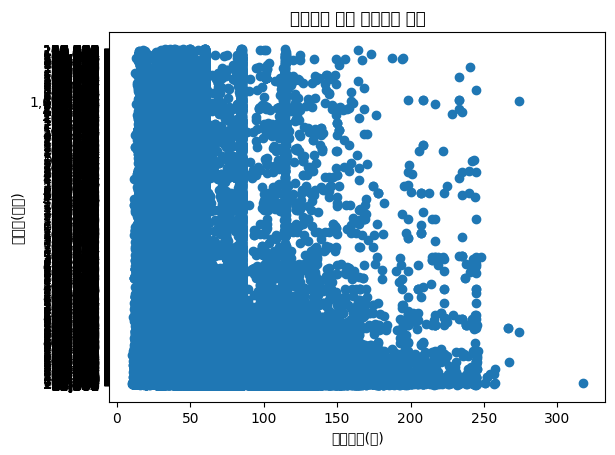

In [43]:
# 산점도를 그려 관계 시각화
plt.scatter(x=df['전용면적(㎡)'], y=df['보증금(만원)'])
plt.xlabel('전용면적(㎡)')
plt.ylabel('보증금(만원)')
plt.title("보증금에 따른 전용면적 크기")
plt.show()

c:\POTENUP\08_EDA_Analysis_Study\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\POTENUP\08_EDA_Analysis_Study\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


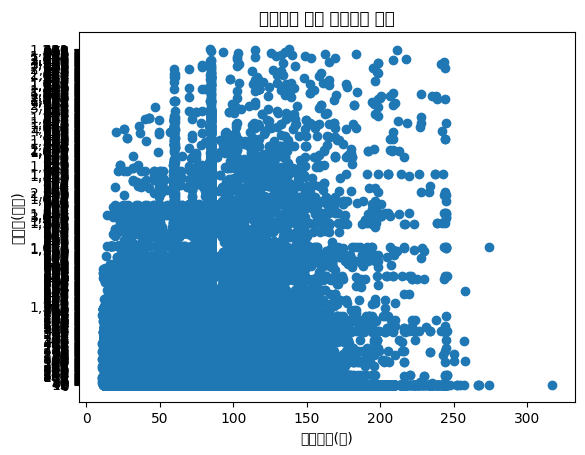

In [44]:
# 산점도를 그려 관계 시각화
plt.scatter(x=df['전용면적(㎡)'], y=df['월세금(만원)'])
plt.xlabel('전용면적(㎡)')
plt.ylabel('월세금(만원)')
plt.title("월세금에 따른 전용면적 크기")
plt.show()